In [21]:
import os
import pickle
import matplotlib.pyplot as plt

In [22]:
data_path = 'output_data/btes_base_case_orca_price_taker/'
file_names = [f for f in os.listdir(data_path) if f.endswith('.pickle')]

In [42]:
x, y = [], []

for file in file_names:
    with open(os.path.join(data_path, file), 'rb') as f:
        data = pickle.load(f)
        case_data = data['case results']

        cost = case_data['objective [$]'].values[-1]

        btes_cost = (file.split('_')[-1].split('.')[0])
        x.append(btes_cost)
        y.append(cost)

['500', '375', '250']
[2245475.4257402425, 1012335.5652405507, -221643.64069176395]


Text(0.5, 1.0, 'BTES price taker in natural gas based system')

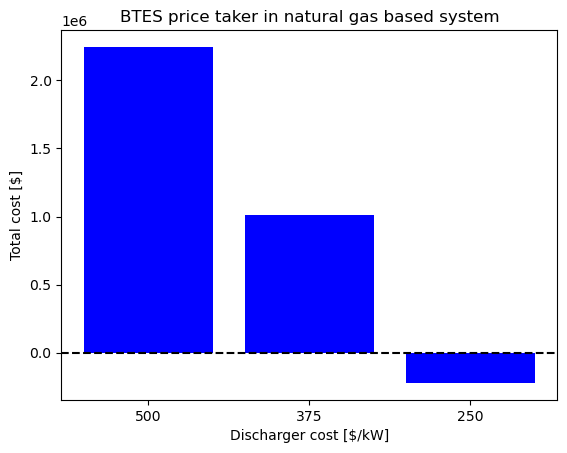

In [29]:
# Plot the data
print(x)
print(y)
for i, cost in enumerate(y):
    plt.bar(x[i], cost, color='blue')
# Dashed horzontal line at 0
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Discharger cost [$/kW]')
plt.ylabel('Total cost [$]')
plt.title('BTES price taker in natural gas based system')

Text(0, 0.5, '(Optimal energy capacity)/(optimal power capacity) [h]')

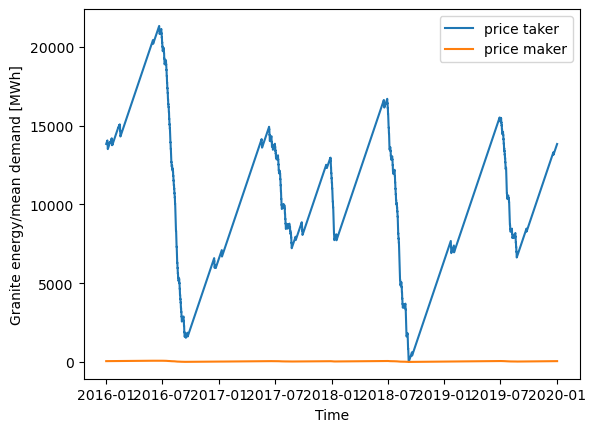

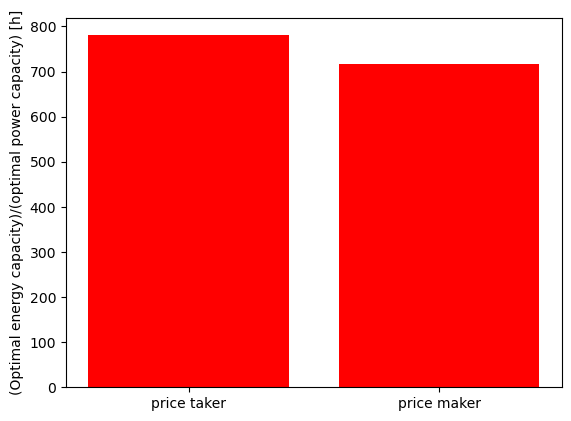

In [53]:
f1 = 'output_data/btes_base_case_orca_price_taker/btes_output_price_taker_base_BTES_discharger_250.pickle'
f2 = 'output_data/btes_base_case_orca/btes_output.pickle'

x2 = ['price taker', 'price maker']
h = []

for filename in [f1, f2]:
    with open(filename, 'rb') as f:
        data = pickle.load(f)

        component_results = data['component results']
        # Get optimal capacity for BTES_discharger and granite
        granite_opt_cap = component_results[component_results.index == ('Store', 'granite')]['Optimal Capacity [MW]'].values[0]
        discharger_opt_cap = component_results[component_results.index == ('Link', 'BTES_discharger')]['Optimal Capacity [MW]'].values[0]
        duration = granite_opt_cap / discharger_opt_cap

        h.append(duration)

        # Time results
        time_results = data['time results']
        granite_e = time_results['granite e']
        mean_demand = time_results['load load'].mean()
        granite_e /= mean_demand
        if 'price_taker' in filename:
            label = 'price taker'
        else:
            label = 'price maker'
        plt.plot(granite_e, label=label)

plt.legend()
plt.xlabel('Time')
plt.ylabel('Granite energy/mean demand [MWh]')

plt.figure()
plt.bar(x2, h, color='red')
plt.ylabel('(Optimal energy capacity)/(optimal power capacity) [h]')
